In [76]:
import numpy as np
import pandas as pd

In [77]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
724,ham,The world is running and i am still.maybe all ...,NaN,NaN,NaN
3189,ham,Hi neva worry bout da truth coz the truth will...,NaN,NaN,NaN
4707,ham,"Did you say bold, then torch later. Or one tor...",NaN,NaN,NaN
3670,ham,Yup. Thk of u oso boring wat.,NaN,NaN,NaN
5557,ham,No. I meant the calculation is the same. That ...,NaN,NaN,NaN


In [78]:
df.shape

(5572, 5)

In [79]:
# 1. Data Cleaning
# 2. Exploratory Data Analysis
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Deploying the website

# DATA CLEANING

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [81]:
# Dropping the unnamed columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [82]:
# Renaming the columns
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [84]:
df['target'] = encoder.fit_transform(df['target'])

In [85]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [86]:
# Missing values check
df.isnull().sum()

target    0
text      0
dtype: int64

In [87]:
# Duplicates check
df.duplicated().sum()

403

In [88]:
# Dropping duplicates
df = df.drop_duplicates(keep = 'first')

In [89]:
df.duplicated().sum()

0

# EDA

In [90]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

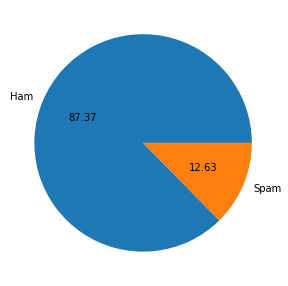

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 5))
plt.pie(df['target'].value_counts(), labels = ['Ham', 'Spam'], autopct = '%0.2f')
plt.show()

In [1]:
import nltk

In [3]:
print(nltk.data.path)

['C:\\Users\\rishi/nltk_data', 'C:\\Users\\rishi\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data', 'C:\\Users\\rishi\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data', 'C:\\Users\\rishi\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data', 'C:\\Users\\rishi\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [2]:
nltk.data.path.append("C:\\Users\\rishi/nltk_data")

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
# Number of characters
df['num_characters'] = df['text'].apply(len)

In [97]:
# Number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [98]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [99]:
# Number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [100]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [101]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [102]:
# Ham msgs
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [103]:
# Spam msgs
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [104]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

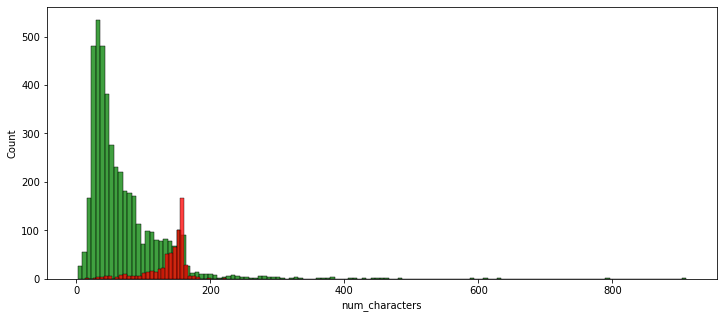

In [105]:
plt.figure(figsize = (12, 5))
sns.histplot(df[df['target'] == 0]['num_characters'], color = 'green')
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

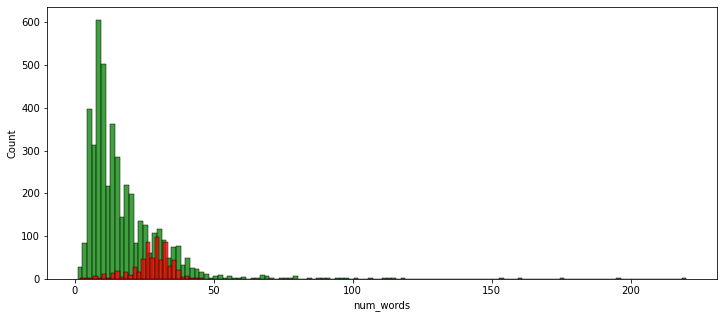

In [106]:
plt.figure(figsize = (12, 5))
sns.histplot(df[df['target'] == 0]['num_words'], color = 'green')
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

<AxesSubplot: >

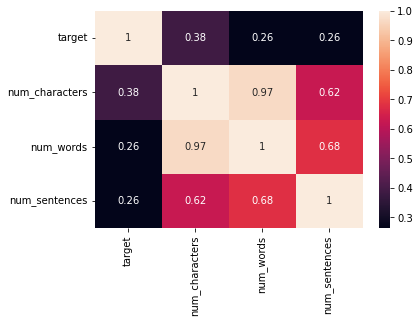

In [107]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot = True)

# PREPROCESSING

In [108]:
# Lower casing
# Tokenization
# Removing special characters
# Removing stop words
# Stemming

In [4]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [111]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [112]:
def transform_data(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    res = []
    for i in text:
        if i.isalnum():
            res.append(i)
    
    text.clear()
    
    for i in res:
        if i not in stopwords.words('english') and i not in string.punctuation:
            text.append(i)
            
    res.clear()
    
    for i in text:
        res.append(ps.stem(i))
    
    return ' '.join(res)

In [113]:
transform_data('Please help me in lifting this.!')

'pleas help lift'

In [114]:
df['transformed_text'] = df['text'].apply(transform_data)

In [115]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [116]:
from wordcloud import WordCloud

In [117]:
spam_word_counts = df[df['target'] == 1]['transformed_text'].str.split().explode().value_counts().head(10)
spam_word_counts

call     320
free     191
2        155
txt      141
text     122
u        119
ur       119
mobil    114
stop     104
repli    103
Name: transformed_text, dtype: int64

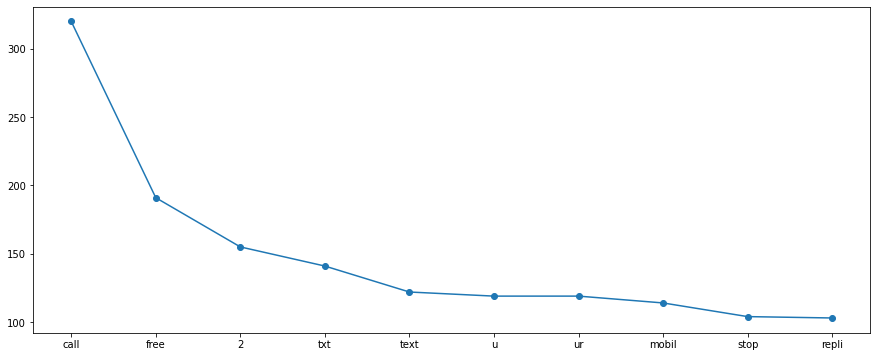

In [118]:
plt.figure(figsize = (15, 6))
plt.plot(spam_word_counts.index, spam_word_counts.values, marker = 'o')
plt.show()

In [119]:
ham_word_counts = df[df['target'] == 0]['transformed_text'].str.split().explode().value_counts().head(10)
ham_word_counts

u       883
go      404
get     349
gt      288
lt      287
2       284
come    275
know    236
got     236
like    234
Name: transformed_text, dtype: int64

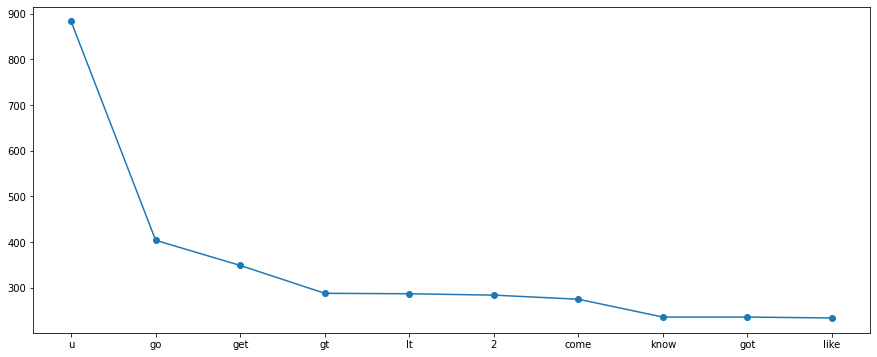

In [120]:
plt.figure(figsize = (15, 6))
plt.plot(ham_word_counts.index, ham_word_counts.values, marker = 'o')
plt.show()

In [121]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# MODEL BUILDING

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [123]:
X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [124]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [125]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [128]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [129]:
bnb = BernoulliNB()

In [130]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [132]:
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()

In [133]:
def train_classifier(clsf, X_train, y_train, X_test, y_test):
    clsf.fit(X_train, y_train)
    y_pred = clsf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [134]:
clsfs =  {
    'LogisticRegression' : lrc,
    'DecisionTree' : dtc,
    'KNN' : knc,
    'BernoulliNB' : bnb
}

In [135]:
accuracy_scores = []
precision_scores = []

for name, clsf in clsfs.items():
    acc, prec = train_classifier(clsf,  X_train, y_train, X_test, y_test)
    print('For', name)
    print('Accuracy:', acc)
    print('Precision:', prec)
    
    accuracy_scores.append(acc)
    precision_scores.append(prec)

For LogisticRegression
Accuracy: 0.9709864603481625
Precision: 0.9736842105263158
For DecisionTree
Accuracy: 0.925531914893617
Precision: 0.9420289855072463
For KNN
Accuracy: 0.9061895551257253
Precision: 1.0
For BernoulliNB
Accuracy: 0.9700193423597679
Precision: 0.9734513274336283


In [136]:
performance_df = pd.DataFrame({'Algorithm' : clsfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Accuracy', ascending = False)

In [137]:
performance_df

,Algorithm,Accuracy,Precision
0,LogisticRegression,0.970986,0.973684
3,BernoulliNB,0.970019,0.973451
1,DecisionTree,0.925532,0.942029
2,KNN,0.906190,1.000000


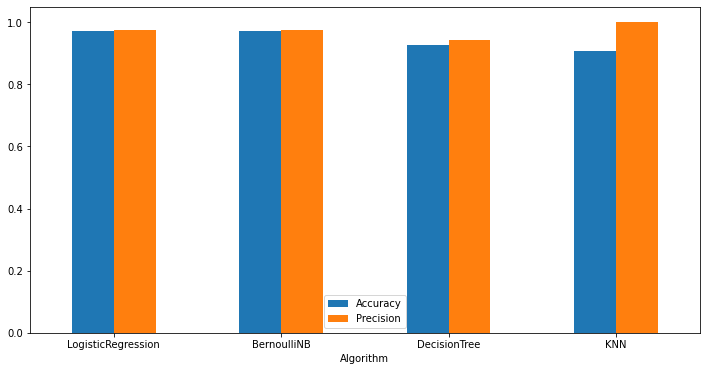

In [138]:
performance_df.set_index('Algorithm', inplace = True)
ax = performance_df.plot(kind = 'bar', figsize = (12, 6), rot = 0)
ax.set_xlabel('Algorithm')
plt.show()

# IMPROVEMENTS

In [139]:
# Lets add another feature 'num_characters' to the existing features
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()
# X1 = cv.fit_transform(df['transformed_text']).toarray()

In [140]:
# X1 = np.hstack((X1, df['num_characters'].values.reshape(-1,1)))

In [141]:
# X1.shape # Shape changed by additional 1 feature

In [142]:
# y1 = df['target'].values
# y1

In [143]:
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 2)

In [144]:
# bnb = BernoulliNB()
# lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
# dtc = DecisionTreeClassifier(max_depth = 5)
# knc = KNeighborsClassifier()

In [145]:
# clsfs =  {
#     'LogisticRegression' : lrc,
#     'DecisionTree' : dtc,
#     'KNN' : knc,
#     'BernoulliNB' : bnb
# }

In [146]:
# accuracy_scores = []
# precision_scores = []

# for name, clsf in clsfs.items():
#     acc, prec = train_classifier(clsf,  X1_train, y1_train, X1_test, y1_test)
#     print('For', name)
#     print('Accuracy:', acc)
#     print('Precision:', prec)
    
#     accuracy_scores.append(acc)
#     precision_scores.append(prec)

In [147]:
# new_df = pd.DataFrame({'Algorithm' : clsfs.keys(), 'Accuracy_new' : accuracy_scores, 'Precision_new' : precision_scores}).sort_values('Accuracy_new', ascending = False)

In [148]:
# new_performance_df = performance_df.merge(new_df, on = 'Algorithm')

In [149]:
# new_performance_df

In [150]:
import pickle
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(bnb, open('model.pkl', 'wb'))